<a href="https://colab.research.google.com/github/Sankytanky100/Data_Science-Projects/blob/main/Forest_Fires_(Multiple_Linear_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np


   temp  humid  wind  rain  FFMC  DMC    DC  ISI  BUI  FWI  region   fire
0  29.0   57.0  18.0   0.0  65.7  3.4   7.6  1.3  3.4  0.5  Bejaia  False
1  29.0   61.0  13.0   1.3  64.4  4.1   7.6  1.0  3.9  0.4  Bejaia  False
2  26.0   82.0  22.0  13.1  47.1  2.5   7.1  0.3  2.7  0.1  Bejaia  False
3  25.0   89.0  13.0   2.5  28.6  1.3   6.9  0.0  1.7  0.0  Bejaia  False
4  27.0   77.0  16.0   0.0  64.8  3.0  14.2  1.2  3.9  0.5  Bejaia  False


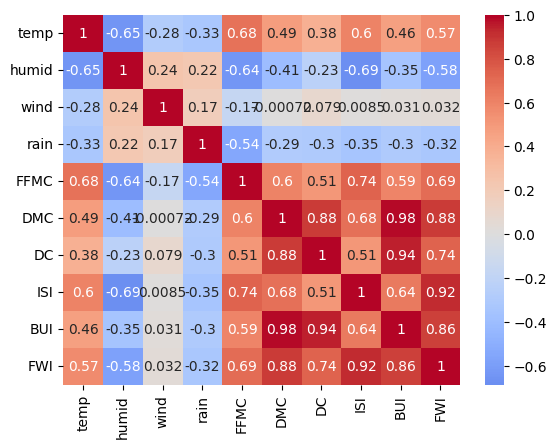

<Figure size 640x480 with 0 Axes>

In [13]:
#load data
forests = pd.read_csv('forests.csv')
print(forests.head(5))

# Check multicollinearity with a heatmap
# Exclude non-numeric columns before computing the correlation matrix
numeric_data = forests.select_dtypes(include=[np.number])
corr_grid = numeric_data.corr()

sns.heatmap(corr_grid, xticklabels=corr_grid.columns, yticklabels=corr_grid.columns, annot=True, cmap="coolwarm", center=0)
plt.show()
plt.clf()

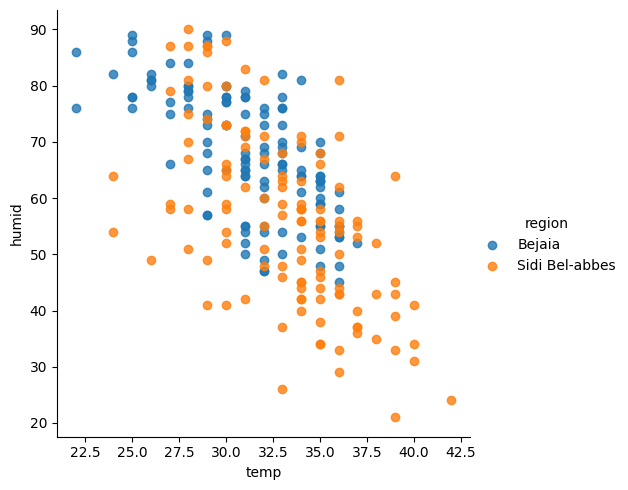

Intercept                   142.575801
region[T.Sidi Bel-abbes]     -7.247538
temp                         -2.392547
dtype: float64


<ipython-input-14-147e5f7224e7>:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(forests.temp, modelH.params[0]+modelH.params[1]*0+modelH.params[2]*forests.temp, color='blue',linewidth=5, label='Bejaia')
<ipython-input-14-147e5f7224e7>:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(forests.temp, modelH.params[0]+modelH.params[1]*1+modelH.params[2]*forests.temp, color='orange',linewidth=5, label='Sidi Bel-abbes')


<Figure size 640x480 with 0 Axes>

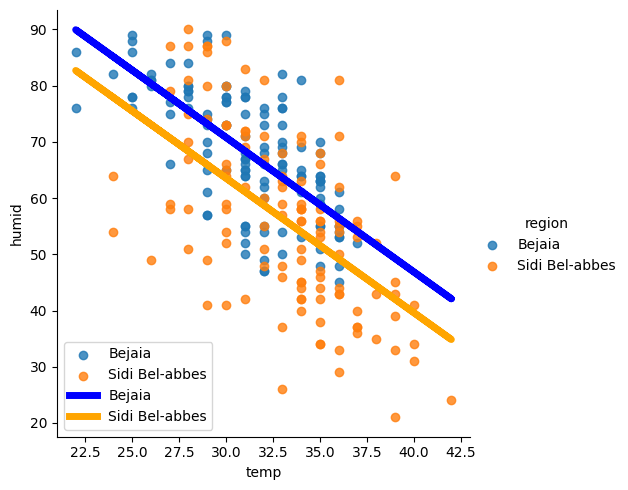

<Figure size 640x480 with 0 Axes>

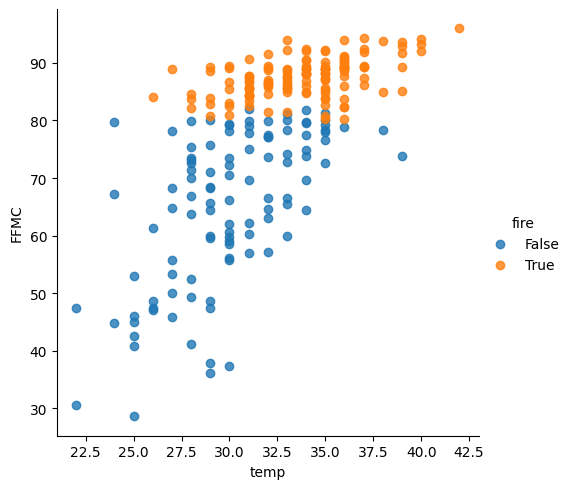

Intercept            -8.108891
fire[T.True]         76.788000
temp                  2.445159
temp:fire[T.True]    -1.887219
dtype: float64


<ipython-input-14-147e5f7224e7>:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(forests.temp, modelF.params[0]+modelF.params[1]*0+modelF.params[2]*forests.temp + modelF.params[3]*forests.temp*0, color='blue',linewidth=5, label='No Fire')
<ipython-input-14-147e5f7224e7>:63: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(forests.temp, modelF.params[0]+modelF.params[1]*1+modelF.params[2]*forests.temp + modelF.params[3]*forests.temp*1, color='orange',linewidth=5, label='Fire')


<Figure size 640x480 with 0 Axes>

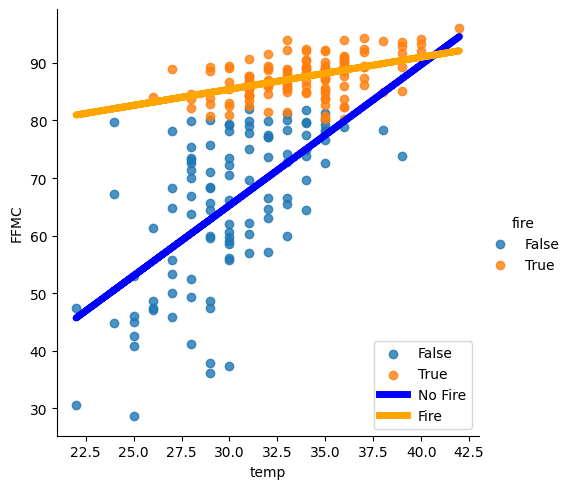

<Figure size 640x480 with 0 Axes>

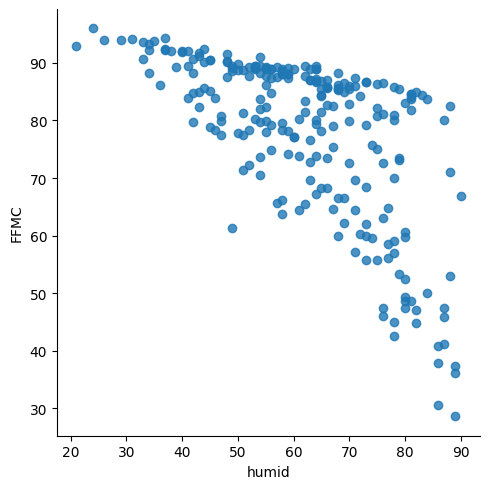

Intercept             77.634041
humid                  0.752165
np.power(humid, 2)    -0.011420
dtype: float64
89.30075097131991
89.97048469230963
81.65244328464414
74.32827643752202
Intercept    50.461574
temp          1.377774
rain         -2.614067
wind          0.419784
humid        -0.345373
dtype: float64
Intercept   -2.270676
ISI          1.133400
BUI          0.235526
dtype: float64


<ipython-input-14-147e5f7224e7>:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(modelP.params[0] + modelP.params[1]*25 + modelP.params[2]*np.power(25,2))
<ipython-input-14-147e5f7224e7>:82: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(modelP.params[0] + modelP.params[1]*35 + modelP.params[2]*np.power(35,2))
<ipython-input-14-147e5f7224e7>:83: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(modelP.params[0] + model

<Figure size 640x480 with 0 Axes>

In [14]:


#plot humidity vs temperature
sns.lmplot(x='temp',y='humid',hue='region',data=forests, fit_reg = False)
plt.show()
plt.clf()

#model predicting humidity
modelH = sm.OLS.from_formula('humid ~ temp + region',data=forests).fit()
print(modelH.params)

#equations
## Full equation:
# humid = 142.6 - 2.4*temp - 7.2*region
## For Bejaia:
# humid = 142.6 - 2.4*temp
## For Sidi Bel-abbes:
# humid = 135.3 - 2.4*temp

#interpretations
## Coefficient on temp:
# Holding region constant, the coefficient on temperature indicates that for every temperature increase of one-degree Celsius, relative humidity decreases by 2.4%.
## For Bejaia equation:
# The intercept indicates that a temperature of zero degrees Celsius is associated with an average relative humidity of 142.6%. (This interpretation is doesn't make sense as relative humidity can't go past 100% and 0 degrees C is far below the temperatures available in our dataset, but we learn the regression line starts higher for Bejaia.)
## For Sidi Bel-abbes equation:
# The intercept indicates that a temperature of zero degrees Celsius is associated with an average relative humidity of 135.3%. (This interpretation is doesn't make sense as relative humidity can't go past 100% and 0 degrees C is far below the temperatures available in our dataset, but we learn the regression line starts lower for Sidi Bel-abbes.)

#plot regression lines
sns.lmplot(x='temp',y='humid',hue='region',data=forests, fit_reg = False)
plt.plot(forests.temp, modelH.params[0]+modelH.params[1]*0+modelH.params[2]*forests.temp, color='blue',linewidth=5, label='Bejaia')
plt.plot(forests.temp, modelH.params[0]+modelH.params[1]*1+modelH.params[2]*forests.temp, color='orange',linewidth=5, label='Sidi Bel-abbes')
plt.legend()
plt.show()
plt.clf()

#plot FFMC vs temperature
sns.lmplot(x='temp',y='FFMC',hue='fire',data=forests, fit_reg = False)
plt.show()
plt.clf()

#model predicting FFMC with interaction
modelF = sm.OLS.from_formula('FFMC ~ temp + fire + temp:fire',data=forests).fit()
print(modelF.params)

#equations
## Full equation:
# FFMC = -8.1 + 2.4*temp + 76.8*fire - 1.9*temp*fire
## For locations without fire:
# FFMC = -8.1 + 2.4*temp
## For locations with fire:
# FFMC = 68.7 + 0.5*temp

#interpretations
## For locations without fire:
# FFMC = -8.1 + 2.4*temp
# For every temperature increase of one degree Celsius, FFMC score increases by 2.4 points.
## For locations with fire:
# FFMC = 68.7 + 0.5*temp
# The regression line has an intercept 76.8 points greater and a slope 1.9 points less than those of the locations that did not end up experiencing a fire.
# For every temperature increase of one degree Celsius, FFMC score increases by 0.5 points.

#plot regression lines
sns.lmplot(x='temp',y='FFMC',hue='fire',data=forests, fit_reg = False)
plt.plot(forests.temp, modelF.params[0]+modelF.params[1]*0+modelF.params[2]*forests.temp + modelF.params[3]*forests.temp*0, color='blue',linewidth=5, label='No Fire')
plt.plot(forests.temp, modelF.params[0]+modelF.params[1]*1+modelF.params[2]*forests.temp + modelF.params[3]*forests.temp*1, color='orange',linewidth=5, label='Fire')
plt.legend()
plt.show()
plt.clf()

#plot FFMC vs humid
sns.lmplot(x='humid',y='FFMC',data=forests, fit_reg = False)
plt.show()
plt.clf()

#polynomial model predicting FFMC
modelP = sm.OLS.from_formula('FFMC ~ humid + np.power(humid,2)',data=forests).fit()
print(modelP.params)

#regression equation
# FFMC = 77.63 + 0.75*humid - 0.01*humid^2

#sample predicted values
print(modelP.params[0] + modelP.params[1]*25 + modelP.params[2]*np.power(25,2))
print(modelP.params[0] + modelP.params[1]*35 + modelP.params[2]*np.power(35,2))
print(modelP.params[0] + modelP.params[1]*60 + modelP.params[2]*np.power(60,2))
print(modelP.params[0] + modelP.params[1]*70 + modelP.params[2]*np.power(70,2))

#interpretation of relationship
# For lower humidity levels, increases in relative humidity are associated with very small increases in FFMC score, until about 35% relative humidity. After this point increases in humidity are associated with increasingly bigger decreases in FFMC score.

#multiple variables to predict FFMC
modelFFMC = sm.OLS.from_formula('FFMC ~ temp + rain + wind + humid',data=forests).fit()
print(modelFFMC.params)
#predict FWI from ISI and BUI
modelFWI = sm.OLS.from_formula('FWI ~ ISI + BUI',data=forests).fit()
print(modelFWI.params)

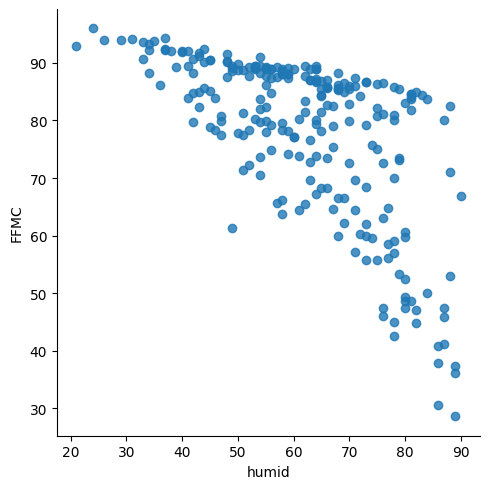

Intercept                77.634041
humid                     0.752165
I(np.power(humid, 2))    -0.011420
dtype: float64
89.30075097131991
89.97048469230963
81.65244328464414
74.32827643752202
Intercept    50.461574
temp          1.377774
rain         -2.614067
wind          0.419784
humid        -0.345373
dtype: float64
Intercept   -2.270676
ISI          1.133400
BUI          0.235526
dtype: float64


In [17]:

#plot FFMC vs humidity
sns.lmplot(x='humid', y='FFMC', data=forests, fit_reg=False)
plt.show()

#polynomial model predicting FFMC
modelP = sm.OLS.from_formula('FFMC ~ humid + I(np.power(humid, 2))', data=forests).fit()
print(modelP.params)


#sample predicted values for different humidity levels
print(modelP.params['Intercept'] + modelP.params['humid']*25 + modelP.params['I(np.power(humid, 2))']*np.power(25, 2))
print(modelP.params['Intercept'] + modelP.params['humid']*35 + modelP.params['I(np.power(humid, 2))']*np.power(35, 2))
print(modelP.params['Intercept'] + modelP.params['humid']*60 + modelP.params['I(np.power(humid, 2))']*np.power(60, 2))
print(modelP.params['Intercept'] + modelP.params['humid']*70 + modelP.params['I(np.power(humid, 2))']*np.power(70, 2))

#multiple variables to predict FFMC
modelFFMC = sm.OLS.from_formula('FFMC ~ temp + rain + wind + humid', data=forests).fit()
print(modelFFMC.params)

#predict FWI from ISI and BUI
modelFWI = sm.OLS.from_formula('FWI ~ ISI + BUI', data=forests).fit()
print(modelFWI.params)
